<h1 style="font-size: 40px; margin-bottom: 0px;">13.1 Exploring DESeq2 results</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

In notebook 12-2, we ran DESeq2 on our class dataset and got the results of our differential expression analysis. Today, we'll be playing around with our data, looking at our results in aggregate and pulling out data that we might think is interesting to look at in more detail. We'll set up the MA plot now in Python, but breaking it down into smaller steps to better understand what is going on under the hood when we call up DESeq2's <code>plotMA()</code> function. 

Then we'll set up a volcano plot, which Dr. Ingolia introduced in his differential expression analysis lecture, so that we can visualize the overall transcriptomic changes by plotting the fold change and significance for each gene.  

We'll then pull out specific genes to take a look at in a little more depth by generating violin plots and box-and-whisker plots to take a look at how TAZ KO alters their level of expression.

<strong>Learning objectives:</strong>

<ul>
    <li>Navigate differential expression results</li>
    <li>Practice working with data in Python</li>
    <li>Practice data visualization</li>
    <ul>
        <li>MA plot</li>
        <li>Volcano plot</li>
        <li>Violin plot</li>
        <li>Box-and-whisker plot</li>
    </ul>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">Load in packages</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

For today's plotting, we'll load in a package called <code>adjustText</code> which will allow us to more easily plot a bunch of text without needing to know exactly the text and the positions for which we're plotting. That way, we can pull out relevant information from our data set for plotting and visualization. We'll be able to specify the text objects to plot, and then <code>adjustText</code> will iterate through possible positions to space the text apart and add connecting lines to the data point being annotated. Specifically, we'll make use of it's function <code>adjust_text()</code>.

<a href="https://adjusttext.readthedocs.io/en/latest/" rel="noopener noreferrer"><u>Documentation for <code>adjust_text()</code> can be found here.</u></a>

Since this isn't installed in our Biology Hub, we can go ahead and install it using our notebook.

In [1]:
pip install adjustText

  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
Using cached adjustText-1.3.0-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


Then let's go ahead and import the packages that we'll use for this notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText

<h1 style="font-size: 40px; margin-bottom: 0px;">Import data for today's notebook</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

To start, we'll first import the data that we'll need for today's notebook exercises. We'll be working with:

<ul>
    <li>Normalized counts matrix extracted from DESeq2</li>
    <li>DESeq2 results matrix</li>
    <li>DESeq2 shrunken log fold change results matrix</li>
    <li>Conditions matrix</li>
</ul>

In [3]:
norm_counts = pd.read_csv('~/MCB201B_F2025/Week_10/differential-expression-analysis/1M_class_norm_counts.csv')
res = pd.read_csv('~/MCB201B_F2025/Week_10/differential-expression-analysis/1M_results.csv')
shrinklfc = pd.read_csv('~/MCB201B_F2025/Week_10/differential-expression-analysis/1M_results_lfcShrink.csv')
conditions = pd.read_csv('~/MCB201B_F2025/Week_10/class-set/1M_class_conditions_matrix.csv')

In [4]:
conditions.head().style

,Unnamed: 0,condition
0,ctrl_g1,control
1,tazko_g1,tazko
2,ctrl_g2,control
3,tazko_g2,tazko
4,ctrl_g3,control


To make things easier later on, let's update the first column name to be <code>'gene'</code> for our DataFrames.

In [5]:
updating_col = [norm_counts, res, shrinklfc]

In [6]:
for i in range(0, len(updating_col), 1):
    updating_col[i].rename(columns={updating_col[i].columns[0] : 'gene'},
                           inplace=True
                          )
    print(updating_col[i].columns)

Index(['gene', 'ctrl_g1', 'tazko_g1', 'ctrl_g2', 'tazko_g2', 'ctrl_g3',
       'tazko_g3', 'ctrl_g4', 'tazko_g4', 'ctrl_g5', 'tazko_g5', 'ctrl_g6',
       'tazko_g6', 'ctrl_g7', 'tazko_g7', 'ctrl_g8', 'tazko_g8', 'ctrl_g9',
       'tazko_g9'],
      dtype='object')
Index(['gene', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj'],
      dtype='object')
Index(['gene', 'baseMean', 'log2FoldChange', 'lfcSE', 'pvalue', 'padj'], dtype='object')


In [7]:
norm_counts.head().style

,gene,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
0,A1BG-AS1,0.993195,3.094105,0.000000,1.143745,2.841466,4.465449,0.000000,7.408773,0.959141,1.882807,1.918798,2.490844,0.000000,0.913544,0.968493,1.832776,0.000000,0.000000
1,A4GALT,7.945557,8.250946,14.523575,10.293703,16.101640,7.144719,12.238351,9.260966,4.795706,17.886670,8.634592,9.963376,7.729285,8.221895,19.369854,11.913046,6.457018,10.786287
2,AAAS,17.877503,28.878310,24.205958,27.449875,37.886211,29.471964,29.576015,25.004609,26.855952,25.417899,24.944376,19.926752,38.646424,27.406318,25.180810,44.903018,31.208920,21.572573
3,AACS,23.836671,29.909678,30.983626,28.593619,33.150435,24.113425,28.556153,26.856802,35.488223,25.417899,31.660170,26.153863,33.815621,18.270879,19.369854,28.408032,27.980411,33.257717
4,AADAT,0.993195,4.125473,3.872953,1.143745,4.735776,3.572359,7.139038,4.630483,3.836565,0.941404,1.918798,4.981688,2.898482,5.481264,4.842463,4.581941,4.304679,7.190858


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Generate MA plots with seaborn</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

To refamiliarize ourselves with Python, we'll regenerate MA plots using our results from the DESeq2 dataset to help us better understand what we're looking at in the plot and where the values are coming from.

For this exercise, see if you can plot an MA plot containing the following:
<ul>
    <li>non-significant genes in gray</li>
    <li>upregulated genes highlighted in red</li>
    <li>downregulatd genes highlighted in blue</li>
    <li>a dashed horizontal line at y=0 (<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html" rel="noopener noreferrer"><u>you can use <code>plt.axhline()</code></u></a>)</li>
    <li>TAZ's datapoint highlighted in green</li>
    <li>Annotation to TAZ</li>
</ul>

In [8]:
res_alpha = res.loc[res.padj <= 0.05, :]

In [9]:
res_alpha_upreg = res_alpha.loc[res_alpha.log2FoldChange > 0, :]

In [10]:
res_alpha_downreg = res_alpha.loc[res_alpha.log2FoldChange < 0, :]

In [11]:
TAZ = res.loc[res.gene == 'WWTR1', :]

In [12]:
TAZ

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
16435,WWTR1,26.582427,-2.582015,0.219194,-11.779593,4.973274e-32,5.937827e-30


In [13]:
res.head().style

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,A1BG-AS1,1.717396,1.579446,0.747265,2.113634,0.034547,0.105928
1,A4GALT,10.639844,-0.064188,0.276068,-0.232508,0.816143,0.904300
2,AAAS,28.134083,-0.029254,0.173522,-0.168591,0.866118,0.930518
3,AACS,28.101282,-0.139976,0.158908,-0.880861,0.378393,0.577812
4,AADAT,3.955065,0.101844,0.421201,0.241794,0.808940,0.901120


In [14]:
TAZ.gene.item()

'WWTR1'

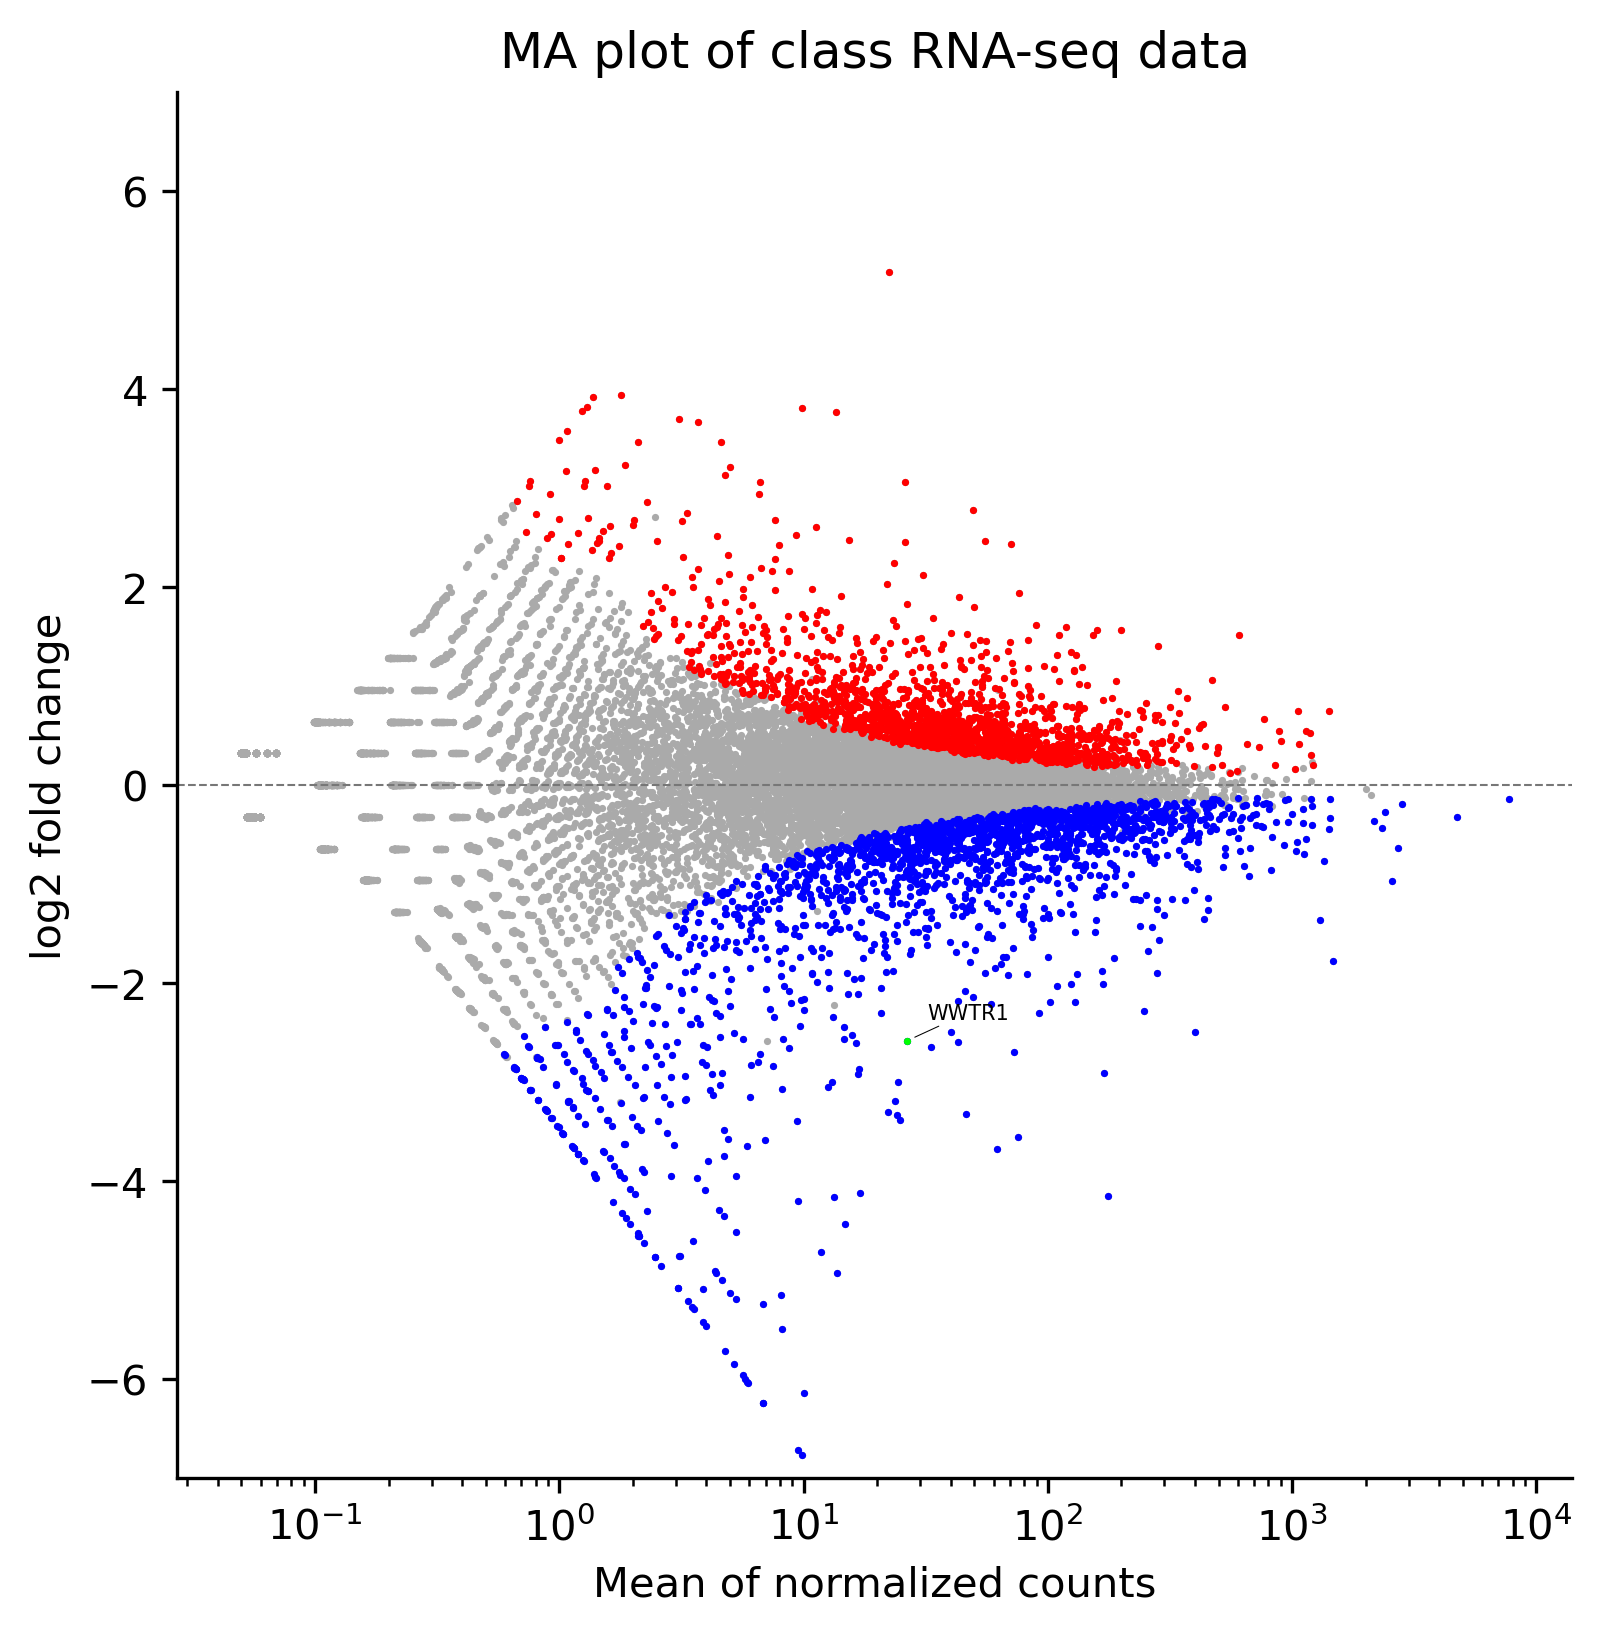

In [15]:
fig, ax = plt.subplots()

results_list = [res, res_alpha_upreg, res_alpha_downreg, TAZ]
colors_to_use = ['#AAAAAA', '#FF0000', '#0000FF', '#00FF00']

for i in range(0, len(results_list), 1):
    sns.scatterplot(x=results_list[i].baseMean,
                    y=results_list[i].log2FoldChange,
                    s=3,
                    c=colors_to_use[i],
                    lw=0
                   )

plt.axhline(y=0,
            c='#777777',
            lw=0.5,
            ls='--',
           )

txt_annotation = [plt.text(TAZ.baseMean, TAZ.log2FoldChange, TAZ.gene.item(), fontsize=5)]

ax.set_ylim(-7, 7)
ax.set_xscale('log')
ax.set_title('MA plot of class RNA-seq data')
ax.set_xlabel('Mean of normalized counts')
ax.set_ylabel('log2 fold change')

fig.set_dpi(300)
fig.set_size_inches(6, 6)
sns.despine()

adjustText.adjust_text(txt_annotation,
                       expand=(1.5, 3),
                       arrowprops={'arrowstyle' : '-',
                                   'linewidth' : 0.25
                                  },
                      )

fig.savefig('../Week_10/differential-expression-analysis/1M_class_MA_plot.pdf',
            bbox_inches = 'tight',
           )

<h2>Plot MA plot of shrunken log2 fold change</h2>

For this, see what adjustments you'll need to make to your code from the previous MA plot to visualize the shrunken log2 fold change.

In [16]:
shrinklfc_alpha = shrinklfc.loc[shrinklfc.padj <= 0.05, :]
shrinklfc_alpha_upreg = shrinklfc_alpha.loc[shrinklfc_alpha.log2FoldChange > 0, :]
shrinklfc_alpha_downreg = shrinklfc_alpha.loc[shrinklfc_alpha.log2FoldChange < 0, :]
shrinklfc_TAZ = shrinklfc.loc[shrinklfc.gene == 'WWTR1', :]

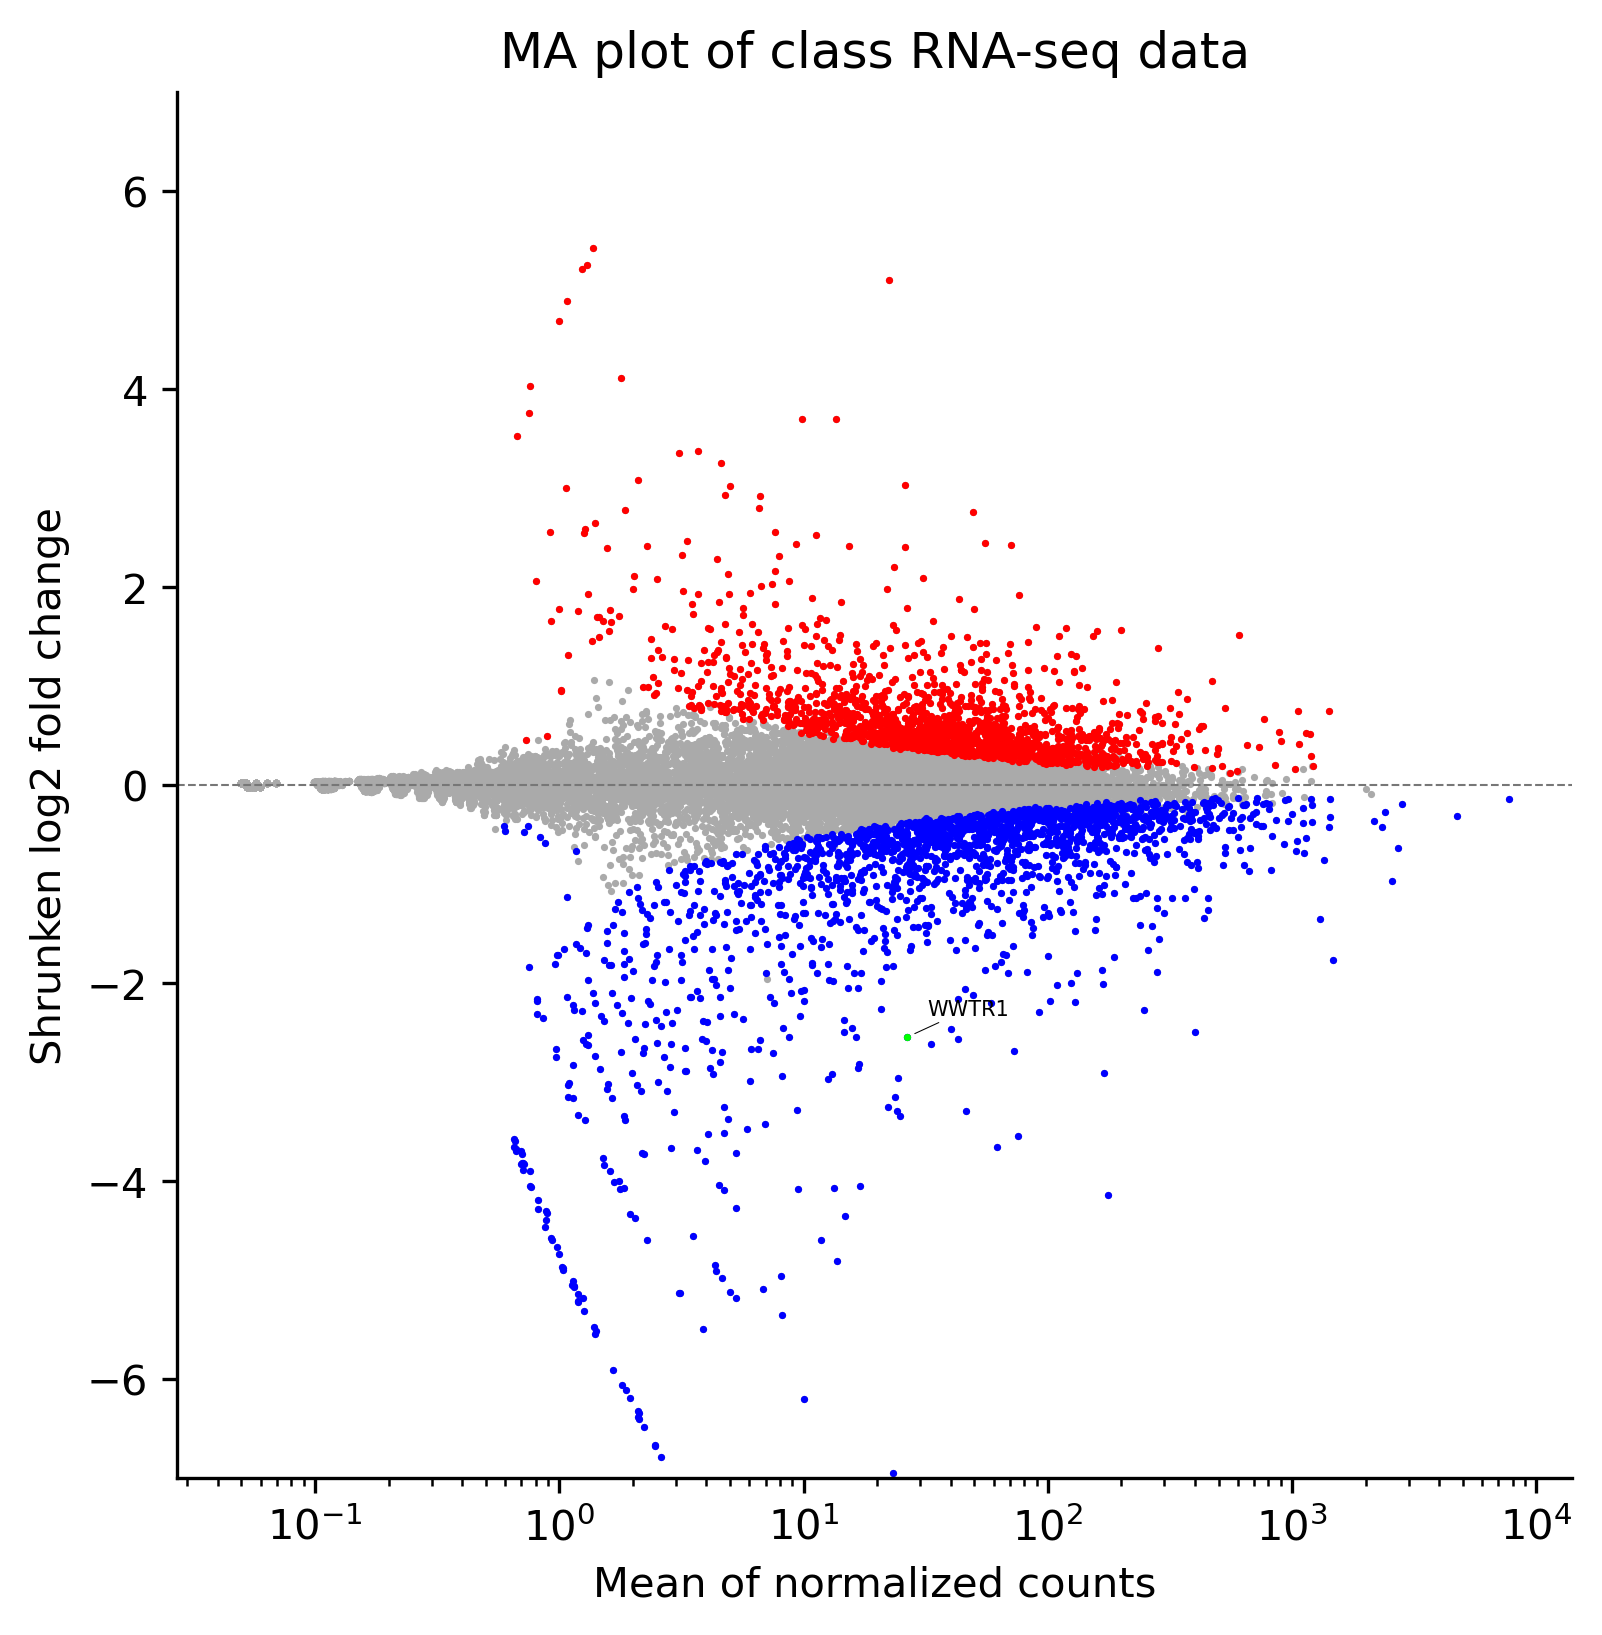

In [17]:
fig, ax = plt.subplots()

results_list = [shrinklfc, shrinklfc_alpha_upreg, shrinklfc_alpha_downreg, shrinklfc_TAZ]
colors_to_use = ['#AAAAAA', '#FF0000', '#0000FF', '#00FF00']

for i in range(0, len(results_list), 1):
    sns.scatterplot(x=results_list[i].baseMean,
                    y=results_list[i].log2FoldChange,
                    s=3,
                    c=colors_to_use[i],
                    lw=0
                   )

plt.axhline(y=0,
            c='#777777',
            lw=0.5,
            ls='--',
           )

txt_annotation = [plt.text(shrinklfc_TAZ.baseMean, 
                           shrinklfc_TAZ.log2FoldChange, 
                           shrinklfc_TAZ.gene.item(), 
                           fontsize=5)]

ax.set_ylim(-7, 7)
ax.set_xscale('log')
ax.set_title('MA plot of class RNA-seq data')
ax.set_xlabel('Mean of normalized counts')
ax.set_ylabel('Shrunken log2 fold change')

fig.set_dpi(300)
fig.set_size_inches(6, 6)
sns.despine()

adjustText.adjust_text(txt_annotation,
                       expand=(1.5, 3),
                       arrowprops={'arrowstyle' : '-',
                                   'linewidth' : 0.25
                                  },
                      )

fig.savefig('../Week_10/differential-expression-analysis/1M_class_MA_plot_shrunken.pdf',
            bbox_inches = 'tight',
           )

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Generate a volcano plot from your results</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Another plot that you'll commonly see with accompanying differential expression analyses is the volcano plot. In volcano plots, each gene's log2 fold change is plotted along the x-axis, and its -log10(padj) is plotted along the y-axis. The resulting scatterplot sort of resembles an erupting volcano with the most significant genes higher up along the y-axis, while genes that exhibit a greater log2 fold change are found further towards the negative and positive extremes of the x-axis.

For this exercise, take what you know from setting up your MA plots to now generate a volcano plot that includes the following:
<ul>
    <li>non-significant genes in gray</li>
    <li>upregulated genes highlighted in red</li>
    <li>downregulatd genes highlighted in blue</li>
    <li>dashed lines demarcating the following:</li>
    <ul>
        <li>a log2 fold change of -1</li>
        <li>a log2 fold change of +1</li>
        <li>a padj of 0.05</li>
    </ul>
    <li>Top 10 upregulated genes annotated based on their significance</li>
    <li>Top 10 downregulated genes annotated based on their significance</li>
</ul>

In [18]:
upreg = res_alpha.loc[res_alpha.log2FoldChange >= 1, :].copy()
downreg = res_alpha.loc[res_alpha.log2FoldChange <= -1, :].copy()

In [19]:
top10_upreg = upreg.sort_values('padj').head(10)
top10_downreg = downreg.sort_values('padj').head(10)[1:]
F3 = downreg.loc[downreg.gene == 'F3', :]

In [20]:
F3

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4303,F3,400.543384,-2.493562,0.064705,-38.537573,0.0,0.0


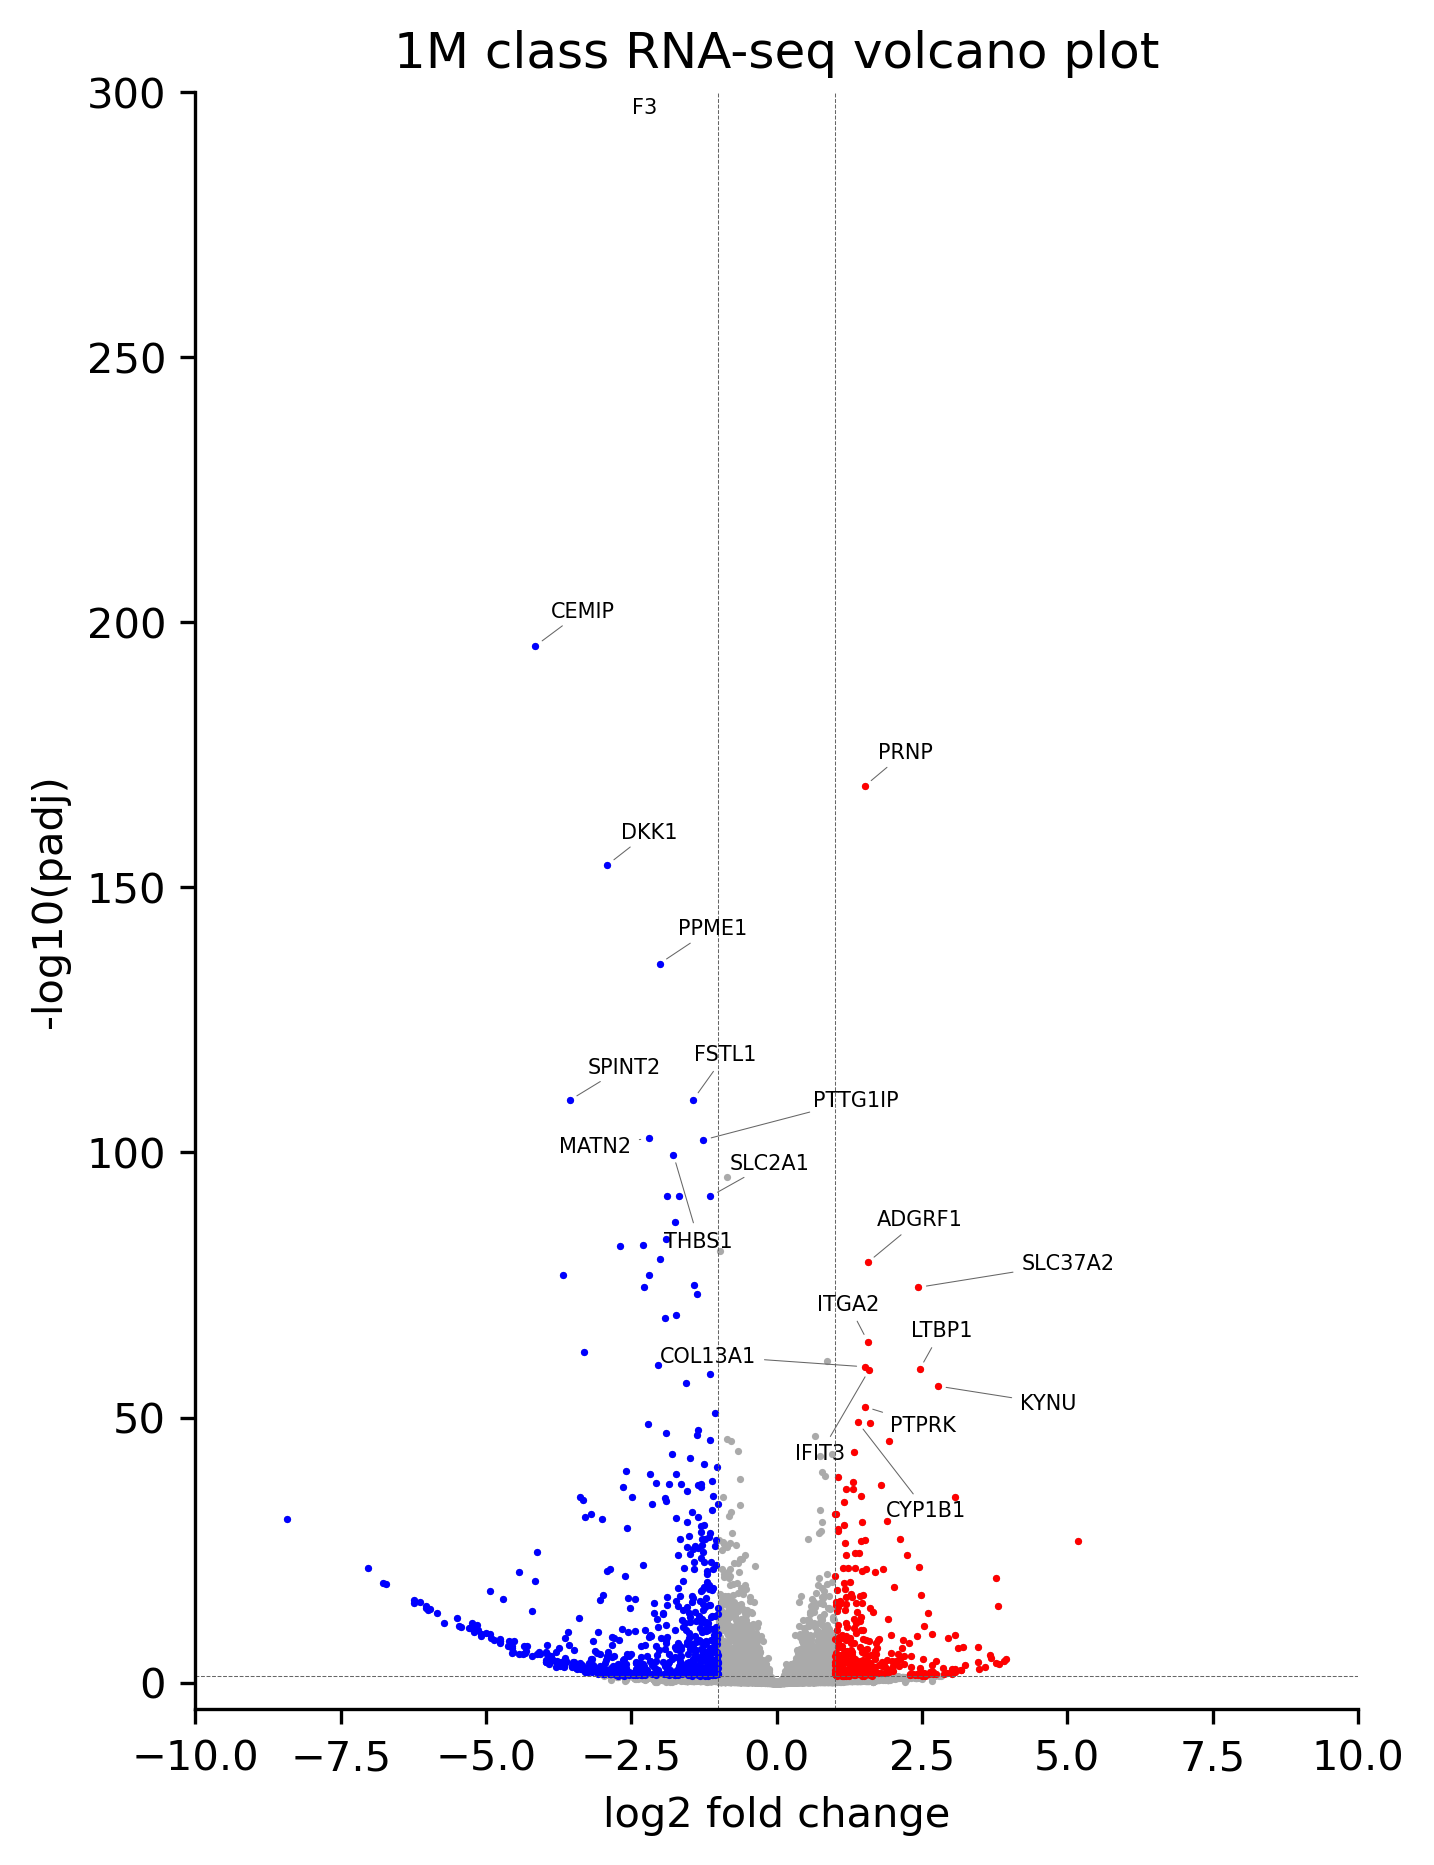

In [21]:
fig, ax = plt.subplots()

results_list = [res, upreg, downreg]

for i in range(0, len(results_list), 1):
    sns.scatterplot(x=results_list[i].log2FoldChange,
                    y=np.log10(results_list[i].padj.pow(-1)),
                    s=3,
                    c=colors_to_use[i],
                    lw=0,
                   )

plt.axhline(y=np.log10(0.05**-1),
            c='#666666',
            lw=0.25,
            ls='--',
           )

plt.axvline(x=1,
            c='#666666',
            lw=0.25,
            ls='--',
           )

plt.axvline(x=-1,
            c='#666666',
            lw=0.25,
            ls='--',
           )

txt_up = [plt.text(x, np.log10(y), txt, fontsize=5) for x, y, txt in zip(top10_upreg.log2FoldChange, top10_upreg.padj**-1, top10_upreg.gene)]
txt_down = [plt.text(x, np.log10(y), txt, fontsize=5) for x, y, txt in zip(top10_downreg.log2FoldChange, top10_downreg.padj**-1, top10_downreg.gene)]

plt.text(F3.log2FoldChange, 296, F3.gene.item(), fontsize=5)

ax.set_ylim(-5, 300)
ax.set_xlim(-10, 10)
plt.title('1M class RNA-seq volcano plot')
plt.xlabel('log2 fold change')
plt.ylabel('-log10(padj)')

fig.set_dpi(300)
fig.set_size_inches(5, 7)
sns.despine()

adjustText.adjust_text(txt_up,
                       expand=(1.5, 3.5),
                       force_text=(2, 4),
                       arrowprops={'arrowstyle' : '-',
                                   'linewidth' : 0.25,
                                   'color' : '#666666'
                                  },
                      )

adjustText.adjust_text(txt_down,
                       expand=(1.5, 3.5),
                       force_text=(2, 4),
                       arrowprops={'arrowstyle' : '-',
                                   'linewidth' : 0.25,
                                   'color' : '#666666'
                                  },
                      )

fig.savefig('../Week_10/differential-expression-analysis/1M_class_volcano_plot.pdf',
            bbox_inches = 'tight',
           )

<h1 style="font-size: 40px; margin-bottom: 0px;">Violin plots and box-and-whisker plots</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Another way that you can visualize your RNA-seq data is to generate violin plots or box-and-whisker plots for individual genes (or sets of genes) using the normalized counts. The set up for either one is the same since they are essentially different ways of visualizing the distribution of your samples.

For plotting violin plots, we'll make use of <code>sns.violinplot()</code>. <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html" rel="noopener noreferrer"><u>Documentation for <code>sns.violinplot()</code> can be found here.</u></a>

And to plot a box-and-whisker plot, we'll make use of <code>sns.boxplot()</code>. <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" rel="noopener noreferrer"><u>Documentation for <code>sns.boxplot()</code> can be found here.</u></a>

For this guided exercise, we can continue to make use of the genes that were identified to be differentially expressed that we labeled in our volcano plot and use them to pull out the associated normalized counts. First we can do this for our top ten significantly upregulated genes (based on their <code>'padj'</code>).

In [22]:
top10_upreg

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
11254,PRNP,607.601777,1.517942,0.054054,28.082143,1.618765e-173,7.344338e-170
260,ADGRF1,158.725037,1.566567,0.081269,19.276318,8.490993e-83,5.503377e-80
13511,SLC37A2,70.621899,2.436624,0.130325,18.696550,5.281352e-78,2.764788e-75
6401,ITGA2,199.873167,1.571279,0.090397,17.381898,1.131462e-67,5.133445e-65
2722,COL13A1,111.258379,1.519757,0.090779,16.741212,6.563820e-63,2.627652e-60
8157,LTBP1,55.533262,2.460823,0.147600,16.672275,2.085064e-62,8.108515e-60
6109,IFIT3,118.539360,1.594576,0.095692,16.663633,2.409330e-62,9.109274e-60
6849,KYNU,49.222515,2.775069,0.171023,16.226281,3.287856e-59,1.147462e-56
11512,PTPRK,152.546939,1.517467,0.096874,15.664356,2.651002e-55,9.020699e-53
3123,CYP1B1,281.864089,1.399749,0.091966,15.220292,2.593691e-52,8.405411e-50


In [23]:
norm_counts_upreg = norm_counts.loc[norm_counts.gene.isin(top10_upreg.gene), :]

Let's take a look at the new filtered DataFrame.

In [24]:
norm_counts_upreg.style

,gene,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
260,ADGRF1,67.537234,238.246057,84.236733,248.192616,78.613888,258.996046,79.549283,224.115385,74.813010,193.929155,93.061711,225.421387,81.157490,251.224579,76.510923,239.177300,86.093573,256.174305
2722,COL13A1,60.584872,170.175755,56.157822,177.280440,55.882161,175.045604,72.410245,159.288621,57.548469,159.097219,51.807551,158.168597,57.969636,162.610819,41.645186,173.197355,64.570180,149.210297
3123,CYP1B1,168.843085,350.665192,181.060564,396.879436,117.447254,485.840859,149.919802,437.117610,155.380867,316.311631,128.559478,403.516736,146.856411,453.117787,160.769787,369.304414,187.253521,464.709177
6109,IFIT3,58.598482,162.956178,42.602486,179.567929,71.983801,154.504538,66.291069,201.889066,65.221598,200.518980,59.482743,164.395707,64.732760,168.092082,52.298605,179.612072,49.503804,191.456586
6401,ITGA2,89.387515,298.065413,91.982639,338.548453,131.654583,328.657052,75.469832,313.020661,101.668962,249.471971,99.777505,317.582617,86.954454,290.506968,105.565703,252.006734,122.683341,304.712594
6849,KYNU,4.965973,79.415352,10.650621,105.224519,10.418708,77.698814,10.198626,89.831373,6.713988,82.843522,21.106780,69.743633,13.526248,96.835656,20.338347,80.642155,15.066375,90.784578
8157,LTBP1,15.891114,80.446721,24.205958,106.368264,13.260174,94.667520,10.198626,92.609663,17.264541,80.019311,16.309784,109.597138,20.289373,94.095024,16.464376,82.474931,19.371054,106.065151
11254,PRNP,319.808666,809.624047,329.201026,889.833434,318.244173,943.995934,297.799879,918.687858,318.434863,814.314169,291.657322,865.568308,340.088530,892.532415,298.295749,934.715887,318.546219,1035.483505
11512,PTPRK,87.401126,212.461852,74.554350,250.480105,87.138285,268.820034,53.032855,225.041481,86.322704,171.335467,94.021110,234.139341,75.360527,226.558893,73.605444,202.521775,78.560385,244.489161
13511,SLC37A2,13.904725,128.921027,22.269481,105.224519,22.731727,134.856562,19.377389,121.318659,23.978529,107.320018,17.269184,117.069670,20.289373,114.192991,35.834230,117.297680,22.599563,126.738867


Much like how DESeq2 required a conditions matrix to understand which condition each sample belonged to, we'll swap out our column headers with the information from our conditions matrix. That way, we can specify how we want to group our data later on based on which condition each sample belongs to. 

In [25]:
norm_counts_upreg.columns = ['gene'] + conditions.condition.to_list()

In [26]:
norm_counts_upreg

,gene,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko
260,ADGRF1,67.537234,238.246057,84.236733,248.192616,78.613888,258.996046,79.549283,224.115385,74.813010,193.929155,93.061711,225.421387,81.157490,251.224579,76.510923,239.177300,86.093573,256.174305
2722,COL13A1,60.584872,170.175755,56.157822,177.280440,55.882161,175.045604,72.410245,159.288621,57.548469,159.097219,51.807551,158.168597,57.969636,162.610819,41.645186,173.197355,64.570180,149.210297
3123,CYP1B1,168.843085,350.665192,181.060564,396.879436,117.447254,485.840859,149.919802,437.117610,155.380867,316.311631,128.559478,403.516736,146.856411,453.117787,160.769787,369.304414,187.253521,464.709177
6109,IFIT3,58.598482,162.956178,42.602486,179.567929,71.983801,154.504538,66.291069,201.889066,65.221598,200.518980,59.482743,164.395707,64.732760,168.092082,52.298605,179.612072,49.503804,191.456586
6401,ITGA2,89.387515,298.065413,91.982639,338.548453,131.654583,328.657052,75.469832,313.020661,101.668962,249.471971,99.777505,317.582617,86.954454,290.506968,105.565703,252.006734,122.683341,304.712594
6849,KYNU,4.965973,79.415352,10.650621,105.224519,10.418708,77.698814,10.198626,89.831373,6.713988,82.843522,21.106780,69.743633,13.526248,96.835656,20.338347,80.642155,15.066375,90.784578
8157,LTBP1,15.891114,80.446721,24.205958,106.368264,13.260174,94.667520,10.198626,92.609663,17.264541,80.019311,16.309784,109.597138,20.289373,94.095024,16.464376,82.474931,19.371054,106.065151
11254,PRNP,319.808666,809.624047,329.201026,889.833434,318.244173,943.995934,297.799879,918.687858,318.434863,814.314169,291.657322,865.568308,340.088530,892.532415,298.295749,934.715887,318.546219,1035.483505
11512,PTPRK,87.401126,212.461852,74.554350,250.480105,87.138285,268.820034,53.032855,225.041481,86.322704,171.335467,94.021110,234.139341,75.360527,226.558893,73.605444,202.521775,78.560385,244.489161
13511,SLC37A2,13.904725,128.921027,22.269481,105.224519,22.731727,134.856562,19.377389,121.318659,23.978529,107.320018,17.269184,117.069670,20.289373,114.192991,35.834230,117.297680,22.599563,126.738867


We can then move our gene names and use them as an index. That way, when we transpose our DataFrame, the gene names will become the column headers.

In [27]:
norm_counts_upreg.set_index('gene', inplace=True)

In [28]:
norm_counts_upreg

,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko,control,tazko
gene,,,,,,,,,,,,,,,,,,
ADGRF1,67.537234,238.246057,84.236733,248.192616,78.613888,258.996046,79.549283,224.115385,74.813010,193.929155,93.061711,225.421387,81.157490,251.224579,76.510923,239.177300,86.093573,256.174305
COL13A1,60.584872,170.175755,56.157822,177.280440,55.882161,175.045604,72.410245,159.288621,57.548469,159.097219,51.807551,158.168597,57.969636,162.610819,41.645186,173.197355,64.570180,149.210297
CYP1B1,168.843085,350.665192,181.060564,396.879436,117.447254,485.840859,149.919802,437.117610,155.380867,316.311631,128.559478,403.516736,146.856411,453.117787,160.769787,369.304414,187.253521,464.709177
IFIT3,58.598482,162.956178,42.602486,179.567929,71.983801,154.504538,66.291069,201.889066,65.221598,200.518980,59.482743,164.395707,64.732760,168.092082,52.298605,179.612072,49.503804,191.456586
ITGA2,89.387515,298.065413,91.982639,338.548453,131.654583,328.657052,75.469832,313.020661,101.668962,249.471971,99.777505,317.582617,86.954454,290.506968,105.565703,252.006734,122.683341,304.712594
KYNU,4.965973,79.415352,10.650621,105.224519,10.418708,77.698814,10.198626,89.831373,6.713988,82.843522,21.106780,69.743633,13.526248,96.835656,20.338347,80.642155,15.066375,90.784578
LTBP1,15.891114,80.446721,24.205958,106.368264,13.260174,94.667520,10.198626,92.609663,17.264541,80.019311,16.309784,109.597138,20.289373,94.095024,16.464376,82.474931,19.371054,106.065151
PRNP,319.808666,809.624047,329.201026,889.833434,318.244173,943.995934,297.799879,918.687858,318.434863,814.314169,291.657322,865.568308,340.088530,892.532415,298.295749,934.715887,318.546219,1035.483505
PTPRK,87.401126,212.461852,74.554350,250.480105,87.138285,268.820034,53.032855,225.041481,86.322704,171.335467,94.021110,234.139341,75.360527,226.558893,73.605444,202.521775,78.560385,244.489161


Now let's transpose our DataFrame.

In [29]:
norm_counts_upreg = norm_counts_upreg.T

Now let's take another look at our data:

In [30]:
norm_counts_upreg

gene,ADGRF1,COL13A1,CYP1B1,IFIT3,ITGA2,KYNU,LTBP1,PRNP,PTPRK,SLC37A2
control,67.537234,60.584872,168.843085,58.598482,89.387515,4.965973,15.891114,319.808666,87.401126,13.904725
tazko,238.246057,170.175755,350.665192,162.956178,298.065413,79.415352,80.446721,809.624047,212.461852,128.921027
control,84.236733,56.157822,181.060564,42.602486,91.982639,10.650621,24.205958,329.201026,74.554350,22.269481
tazko,248.192616,177.280440,396.879436,179.567929,338.548453,105.224519,106.368264,889.833434,250.480105,105.224519
control,78.613888,55.882161,117.447254,71.983801,131.654583,10.418708,13.260174,318.244173,87.138285,22.731727
tazko,258.996046,175.045604,485.840859,154.504538,328.657052,77.698814,94.667520,943.995934,268.820034,134.856562
control,79.549283,72.410245,149.919802,66.291069,75.469832,10.198626,10.198626,297.799879,53.032855,19.377389
tazko,224.115385,159.288621,437.117610,201.889066,313.020661,89.831373,92.609663,918.687858,225.041481,121.318659
control,74.813010,57.548469,155.380867,65.221598,101.668962,6.713988,17.264541,318.434863,86.322704,23.978529
tazko,193.929155,159.097219,316.311631,200.518980,249.471971,82.843522,80.019311,814.314169,171.335467,107.320018


<h2>Plot a violin plot for a single gene</h2>

Now let's set up a violin plot to take a look at a single gene first by identifying what our X-axis will be and what our Y-axis will be. Then we can begin adding additional parameters to modify the plot, and then call up specific plot attributes to pretty things up.

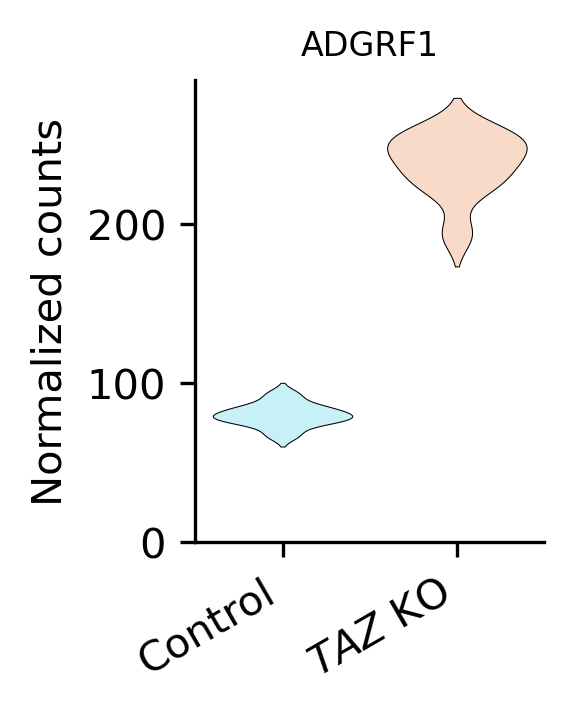

In [31]:
color_set = ['#C0F6FF', '#FFD9C0']

fig, ax = plt.subplots()

sns.violinplot(x=norm_counts_upreg.index,
               y=norm_counts_upreg.ADGRF1,
               hue=norm_counts_upreg.index,
               palette=color_set,
               inner=None,
               bw_method=0.5,
               density_norm='width',
               linewidth=0.25,
               linecolor='k',
              )

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title('ADGRF1',
             fontsize=8,
            )
ax.set_xticks([0,1], 
              ['Control', '$TAZ$ KO'],
              rotation=30,
              ha='right',
             )
plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(1.5, 2)
plt.show()


<h2>Plot a box-and-whisker plot for a single gene</h2>

We can take our code for the violin plot and make modifications to the arguments that we pass to the <code>sns.boxplot()</code> function:

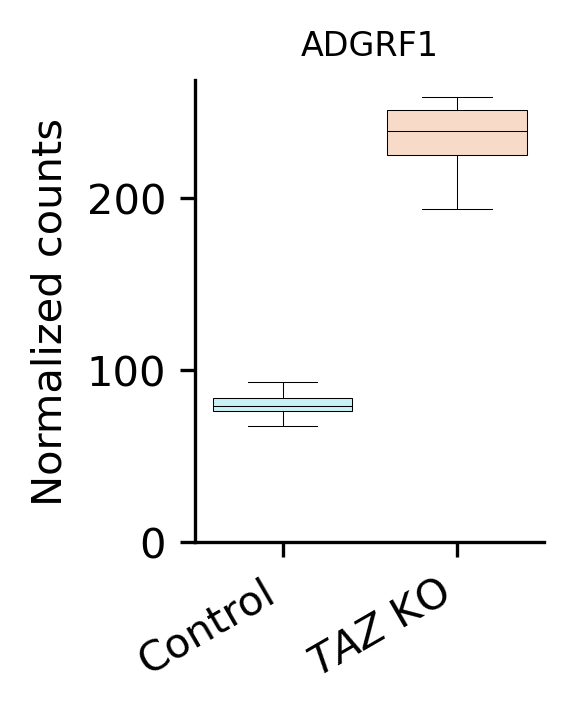

In [32]:
color_set = ['#C0F6FF', '#FFD9C0']

fig, ax = plt.subplots()

sns.boxplot(x=norm_counts_upreg.index,
            y=norm_counts_upreg.ADGRF1,
            hue=norm_counts_upreg.index,
            palette=color_set,
            linewidth=0.25,
            linecolor='k',
           )

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title('ADGRF1',
             fontsize=8,
            )
ax.set_xticks([0,1], 
              ['Control', '$TAZ$ KO'],
              rotation=30,
              ha='right',
             )
plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(1.5, 2)
plt.show()

<h2>Swarmplot for individual genes</h2>

Like with our earlier notebooks, we can also plot our data as a swarmplot with overlaid annotations.

In [33]:
norm_counts_upreg.reset_index(inplace=True, names=['condition'])

In [34]:
norm_counts_upreg

gene,condition,ADGRF1,COL13A1,CYP1B1,IFIT3,ITGA2,KYNU,LTBP1,PRNP,PTPRK,SLC37A2
0,control,67.537234,60.584872,168.843085,58.598482,89.387515,4.965973,15.891114,319.808666,87.401126,13.904725
1,tazko,238.246057,170.175755,350.665192,162.956178,298.065413,79.415352,80.446721,809.624047,212.461852,128.921027
2,control,84.236733,56.157822,181.060564,42.602486,91.982639,10.650621,24.205958,329.201026,74.554350,22.269481
3,tazko,248.192616,177.280440,396.879436,179.567929,338.548453,105.224519,106.368264,889.833434,250.480105,105.224519
4,control,78.613888,55.882161,117.447254,71.983801,131.654583,10.418708,13.260174,318.244173,87.138285,22.731727
5,tazko,258.996046,175.045604,485.840859,154.504538,328.657052,77.698814,94.667520,943.995934,268.820034,134.856562
6,control,79.549283,72.410245,149.919802,66.291069,75.469832,10.198626,10.198626,297.799879,53.032855,19.377389
7,tazko,224.115385,159.288621,437.117610,201.889066,313.020661,89.831373,92.609663,918.687858,225.041481,121.318659
8,control,74.813010,57.548469,155.380867,65.221598,101.668962,6.713988,17.264541,318.434863,86.322704,23.978529
9,tazko,193.929155,159.097219,316.311631,200.518980,249.471971,82.843522,80.019311,814.314169,171.335467,107.320018


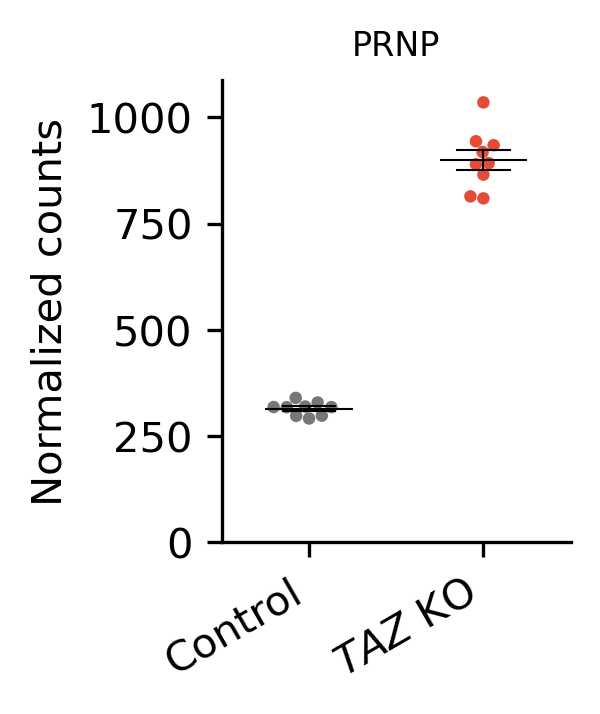

In [35]:
color_set = ['#777777', '#E64B35']
gene_to_see = 'PRNP'

fig, ax = plt.subplots()

sns.swarmplot(data=norm_counts_upreg,
              x='condition',
              y=gene_to_see,
              hue='condition',
              palette=color_set,
              s=3,
              zorder=0
             )

sns.barplot(data=norm_counts_upreg,
            x='condition',
            y=gene_to_see,
            hue='condition',
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth' : 0.5,
                     'color': 'k'
                    },
           )

sns.boxplot(data=norm_counts_upreg,
            x='condition',
            y=gene_to_see,
            hue='condition',
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'color' : 'k',
                       'linestyle' : '-',
                       'linewidth' : 0.5
                      },
            medianprops={'visible' : False},
            whiskerprops={'visible' : False},
            showfliers=False,
            showbox=False,
            showcaps=False,
           )

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title(gene_to_see, 
             fontsize=8,
            )
ax.set_xticks([0,1], 
              ['Control', '$TAZ$ KO'],
              rotation=30,
              ha='right',
             )
plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(1.5, 2)

plt.show()


<h2>Set up to plot multiple gene(s) on a single plot</h2>

The set up to plot multiple genes on a single violin plot or box-and-whisker plot is slightly different than plotting a single gene. Whereas the "wide-format" of our original DataFrame allows us to distinguish between the conditions of each gene, if we want to plot multiple genes, we'll also need to distinguish between genes as well. One way to do this is to convert the "wide-format" DataFrame into a "long-format" DataFrame, where all the normalized count values are contained within a single, long column, and the associated information on which condition (either control or TAZ KO) and which gene it comes from are located in their own respective columns. So with this format, each row corresponds to a single normalized count value and its "metadata".

<table style="text-align: center; margin: auto;">
    <tr>
        <th style="border: none">&nbsp;</th>
        <th style="border: 1px solid; border-color: #000000;">condition</th>
        <th style="border: 1px solid; border-color: #000000;">count</th>
        <th style="border: 1px solid; border-color: #000000;">gene</th>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">0</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">100.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">1</th>
        <td style="border: 1px solid; border-color: #000000;">tazko</td>
        <td style="border: 1px solid; border-color: #000000;">200.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">2</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">150.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">3</th>
        <td style="border: 1px solid; border-color: #000000;">tazko</td>
        <td style="border: 1px solid; border-color: #000000;">300.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">4</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">400.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">5</th>
        <td style="border: 1px solid; border-color: #000000;">tazko</td>
        <td style="border: 1px solid; border-color: #000000;">900.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">6</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">300.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">7</th>
        <td style="border: 1px solid; border-color: #000000;">tazko</td>
        <td style="border: 1px solid; border-color: #000000;">600.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">...</th>
        <td style="border: 1px solid; border-color: #000000;">...</td>
        <td style="border: 1px solid; border-color: #000000;">...</td>
        <td style="border: 1px solid; border-color: #000000;">...</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">96</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">50.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">97</th>
        <td style="border: 1px solid; border-color: #000000;">tazko</td>
        <td style="border: 1px solid; border-color: #000000;">70.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">98</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">20.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">99</th>
        <td style="border: 1px solid; border-color: #000000;">tazko</td>
        <td style="border: 1px solid; border-color: #000000;">30.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
</table>

This can kind of be thought of as flattening or melting our DataFrame, since we're collapsing our 2D normalized count matrix into a single column, and the other columns can be thought of as extra information on where the values came from, so that we can distinguish between genes and conditions.

First, let's take a look again at our normalized counts, and for this example, we're interested in taking a look at just our top upregulated genes.

To flatten our DataFrame, we can make use of the function <code>pd.melt()</code> which will allow us to convert the format of our DataFrame from a "wide-format" to a "long-format".

<a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html" rel="noopener noreferrer"><u>Documentation for <code>pd.melt()</code> is here.</u></a>

<h2>Plot violin plot for upregulated genes</h2>

We can make use of the same code that we used before to plot a violin plot for one gene with slight modifications to have it plot multiple genes together on a single plot.

<h2>Plot a box-and-whisker plot for upregulated genes</h2>

We can similarly modify our box-and-whisker plot code to have it plot multiple genes on the same plot:

<h2>Plot an annotated swarmplot for our upregulated genes</h2>

Now, let's go ahead and use our long form DataFrame for our annotated swarmplot to visualize our set of top 10 upregulated genes.